# MSc Data Science & Analytics Research Scholar Test

## Data Description

This dataset contains information about the demographic and socio-economic situation of 181 galaxies over a period of at most twenty years. The dataset contains 80 variables that describe each galaxy. Each galaxy has a composite index to measure its well-being. Nonetheless, the variables (demographic and socio-economic) that influence the composite measure are unknown. This analysis aims to provide models that can predict what makes the galaxies better off.
## *Objective*

1. To tell which variables best explain the variance of the well-being index for the galaxies. <br>
2. 
Determine the future well-being values of the galaxi.es

# Import Libraries

In [283]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Exploratory Data Analysis

**Import the train and validation (test) datasets**

In [285]:
#import datasets
train_df = pd.read_csv("Train_data.csv")
validation = pd.read_csv("Validation.csv")
train_df.head()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.546539,NaN,0.562809,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078351


**Get the row and columns**

In [287]:
train_df.shape

(3097, 81)

The dataset contains 3097 rows and 81 columns

**Basic information about the train_df dataset**

In [290]:
#get datatype information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita                                       

In [291]:
#get columns information
train_df.columns

Index(['ID', 'galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Lif

In [292]:
print(train_df.describe())

                  ID  galactic year  existence expectancy index  \
count    3097.000000   3.097000e+03                 3096.000000   
mean   157659.407168   9.984641e+05                    0.863193   
std    230716.474733   5.417848e+03                    0.164595   
min     10065.000000   9.900250e+05                    0.227890   
25%     38554.000000   9.940090e+05                    0.749559   
50%     67570.000000   9.980010e+05                    0.899075   
75%     95992.000000   1.003002e+06                    0.985961   
max    998085.000000   1.011030e+06                    1.204456   

       existence expectancy at birth  Gross income per capita  Income Index  \
count                    3096.000000              3069.000000   3069.000000   
mean                       76.197777             31175.236021      0.819082   
std                        10.539559             18574.375226      0.194201   
min                        34.244062              -126.906521      0.292001   
2

**The summary statistics of the dataset**
1. **Count**: This indicates the number of non-null values in the dataset. For instance, there are 3097 out of 3097 non-null values in the Gender Development Index (GDI) column.<br>
2. **Mean**: This indicates the average value in each column. For example, the column of "Adjusted net savings" has an average of 21.017915. <br>
3. **Standard deviation(std)**: This is the measure of dispersion of each value around the mean for each column. The column "Mean years of education (galactic years)" has a standard deviation of 3.072270. the higher the std value the greater the variability.<br>
4. **Min (minimum value) and Max (maximum value)**: this indicates the minimum and maximum value in each column or each feature independently. For example, the minimum value for 'Well-Being Index' is 0.031477 and the maximum is 0.379857.
5. **25% percentile**: This is the 25th percentile (first quartile/Q1) of features in the dataset. The Q1 for 'existence expectancy at birth' is 69.058542. 
6. **50% percentile**: This is the 50th percentile (second quartile/Q2/median). The Q2 for 'existence expectancy at birth' is 78.478324.
7. **75% percentile**: This is the 75th percentile (third quartile/Q3). The Q3 for 'existence expectancy at birth' is 84.135588.

The summary statistics provide an understanding of the central tendency, dispersion, and distribution of features in the dataset.

**Check for duplicates**

In [295]:
train_df.duplicated().sum()

0

There are no duplicate values

**Check for missing values.**

In [298]:
#check for the total count for missing values
train_df.isnull().sum()

ID                                                                              0
galactic year                                                                   0
galaxy                                                                          0
existence expectancy index                                                      1
existence expectancy at birth                                                   1
                                                                             ... 
Adjusted net savings                                                         2654
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    2581
Private galaxy capital flows (% of GGP)                                      2718
Gender Inequality Index (GII)                                                2740
Well-Being Index                                                                0
Length: 81, dtype: int64

In [299]:
#calculate the proportion of missing values in each column
train_df.isnull().sum()/len(train_df)

ID                                                                           0.000000
galactic year                                                                0.000000
galaxy                                                                       0.000000
existence expectancy index                                                   0.000323
existence expectancy at birth                                                0.000323
                                                                               ...   
Adjusted net savings                                                         0.856958
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0.833387
Private galaxy capital flows (% of GGP)                                      0.877624
Gender Inequality Index (GII)                                                0.884727
Well-Being Index                                                             0.000000
Length: 81, dtype: float64



**Filling Null values.**

In [301]:
#Fill in columns with null values
missing_values = train_df.columns[train_df.isnull().any()]
missing_values

for column in missing_values:
    mean_value = train_df[column].mean()
    train_df[column] = train_df[column].fillna(mean_value)

train_df.isnull().sum()

ID                                                                           0
galactic year                                                                0
galaxy                                                                       0
existence expectancy index                                                   0
existence expectancy at birth                                                0
                                                                            ..
Adjusted net savings                                                         0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0
Private galaxy capital flows (% of GGP)                                      0
Gender Inequality Index (GII)                                                0
Well-Being Index                                                             0
Length: 81, dtype: int64

# Explore the validation (test) dataset

In [303]:
validation.head()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
0,886447,1004004,Andromeda Galaxy (M31),0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,687564,1005006,Andromeda Galaxy (M31),0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,494935,1006009,Andromeda Galaxy (M31),0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,378919,1015056,Andromeda Galaxy (M31),0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.753738,NaN,NaN
4,421878,1004004,Andromeda I,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
validation.columns

Index(['ID', 'galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Lif

In [305]:
validation.describe()

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
count,720.000000,7.200000e+02,720.000000,720.000000,720.000000,720.000000,720.000000,717.000000,717.000000,717.000000,...,519.000000,519.000000,519.000000,506.000000,506.000000,465.000000,419.000000,490.000000,481.000000,0.0
mean,540575.762500,1.010517e+06,0.917042,79.691455,33855.573134,0.857504,15.943017,11.157837,0.847852,0.803626,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,NaN
std,269355.612476,3.604656e+03,0.142546,9.501613,19373.363190,0.187758,3.291771,3.364369,0.167249,0.192099,...,0.177948,0.151680,0.078604,47.841923,48.761122,14.795516,5.102837,42.380597,0.202148,NaN
min,13606.000000,1.003002e+06,0.440532,49.560998,547.581752,0.344815,4.879459,2.434786,0.379682,0.331112,...,0.335959,0.415198,0.697446,23.224603,19.728138,-76.741414,0.118915,-735.186887,0.089092,NaN
25%,305458.500000,1.006009e+06,0.818822,73.587883,21838.681733,0.710716,13.767775,8.526625,0.722407,0.661265,...,0.718365,0.755680,0.976213,87.309330,85.210507,14.656609,4.340744,17.239932,0.403722,NaN
50%,538092.500000,1.011030e+06,0.941859,81.639046,28904.644175,0.870243,16.028013,11.331809,0.866130,0.804856,...,0.860671,0.887245,1.036309,125.214846,126.313303,22.777495,5.415610,24.667940,0.601721,NaN
75%,793178.500000,1.013042e+06,1.028266,87.023131,39838.010810,1.000857,18.157923,13.873499,0.967411,0.951526,...,0.987633,0.975993,1.074332,167.093367,163.690516,29.563771,7.009201,31.608334,0.736253,NaN
max,999488.000000,1.015056e+06,1.246908,100.210053,151072.683200,1.324914,26.955944,18.770633,1.232814,1.269625,...,1.237661,1.182746,1.167894,232.720847,233.915373,57.725873,36.538462,85.509692,1.033566,NaN


In [306]:
#find the count for row and columns
validation.shape

(720, 81)

The validation dataset has 720 rows and 81 columns

In [308]:
#find duplicate values
validation.duplicated().sum()

0

In [309]:
#find the null values
validation.isnull().sum()

ID                                                                             0
galactic year                                                                  0
galaxy                                                                         0
existence expectancy index                                                     0
existence expectancy at birth                                                  0
                                                                            ... 
Adjusted net savings                                                         255
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    301
Private galaxy capital flows (% of GGP)                                      230
Gender Inequality Index (GII)                                                239
Predicted Well-Being Index                                                   720
Length: 81, dtype: int64

In [310]:
# fill missing values in the validation dataset
val_missing_values = validation.columns[validation.isnull().any()]
val_missing_values

for column in val_missing_values:
    mean_value = validation[column].mean()
    validation[column] = validation[column].fillna(mean_value)

validation.isnull().sum()

ID                                                                             0
galactic year                                                                  0
galaxy                                                                         0
existence expectancy index                                                     0
existence expectancy at birth                                                  0
                                                                            ... 
Adjusted net savings                                                           0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total      0
Private galaxy capital flows (% of GGP)                                        0
Gender Inequality Index (GII)                                                  0
Predicted Well-Being Index                                                   720
Length: 81, dtype: int64

## Correlation

In [312]:
#general correlation with the target variable (Well-Being Index)
corr_matrix = train_df.corr(numeric_only=True)
print("\nCorrelation matrix:")
print(corr_matrix)


Correlation matrix:
                                                          ID  galactic year  \
ID                                                  1.000000       0.629478   
galactic year                                       0.629478       1.000000   
existence expectancy index                          0.106239       0.132834   
existence expectancy at birth                       0.105992       0.129912   
Gross income per capita                             0.069310       0.083378   
...                                                      ...            ...   
Adjusted net savings                                0.012980       0.003865   
Creature Immunodeficiency Disease prevalence, a...  0.022852       0.074731   
Private galaxy capital flows (% of GGP)            -0.003771      -0.060380   
Gender Inequality Index (GII)                      -0.017624      -0.036744   
Well-Being Index                                    0.021307       0.016315   

                              

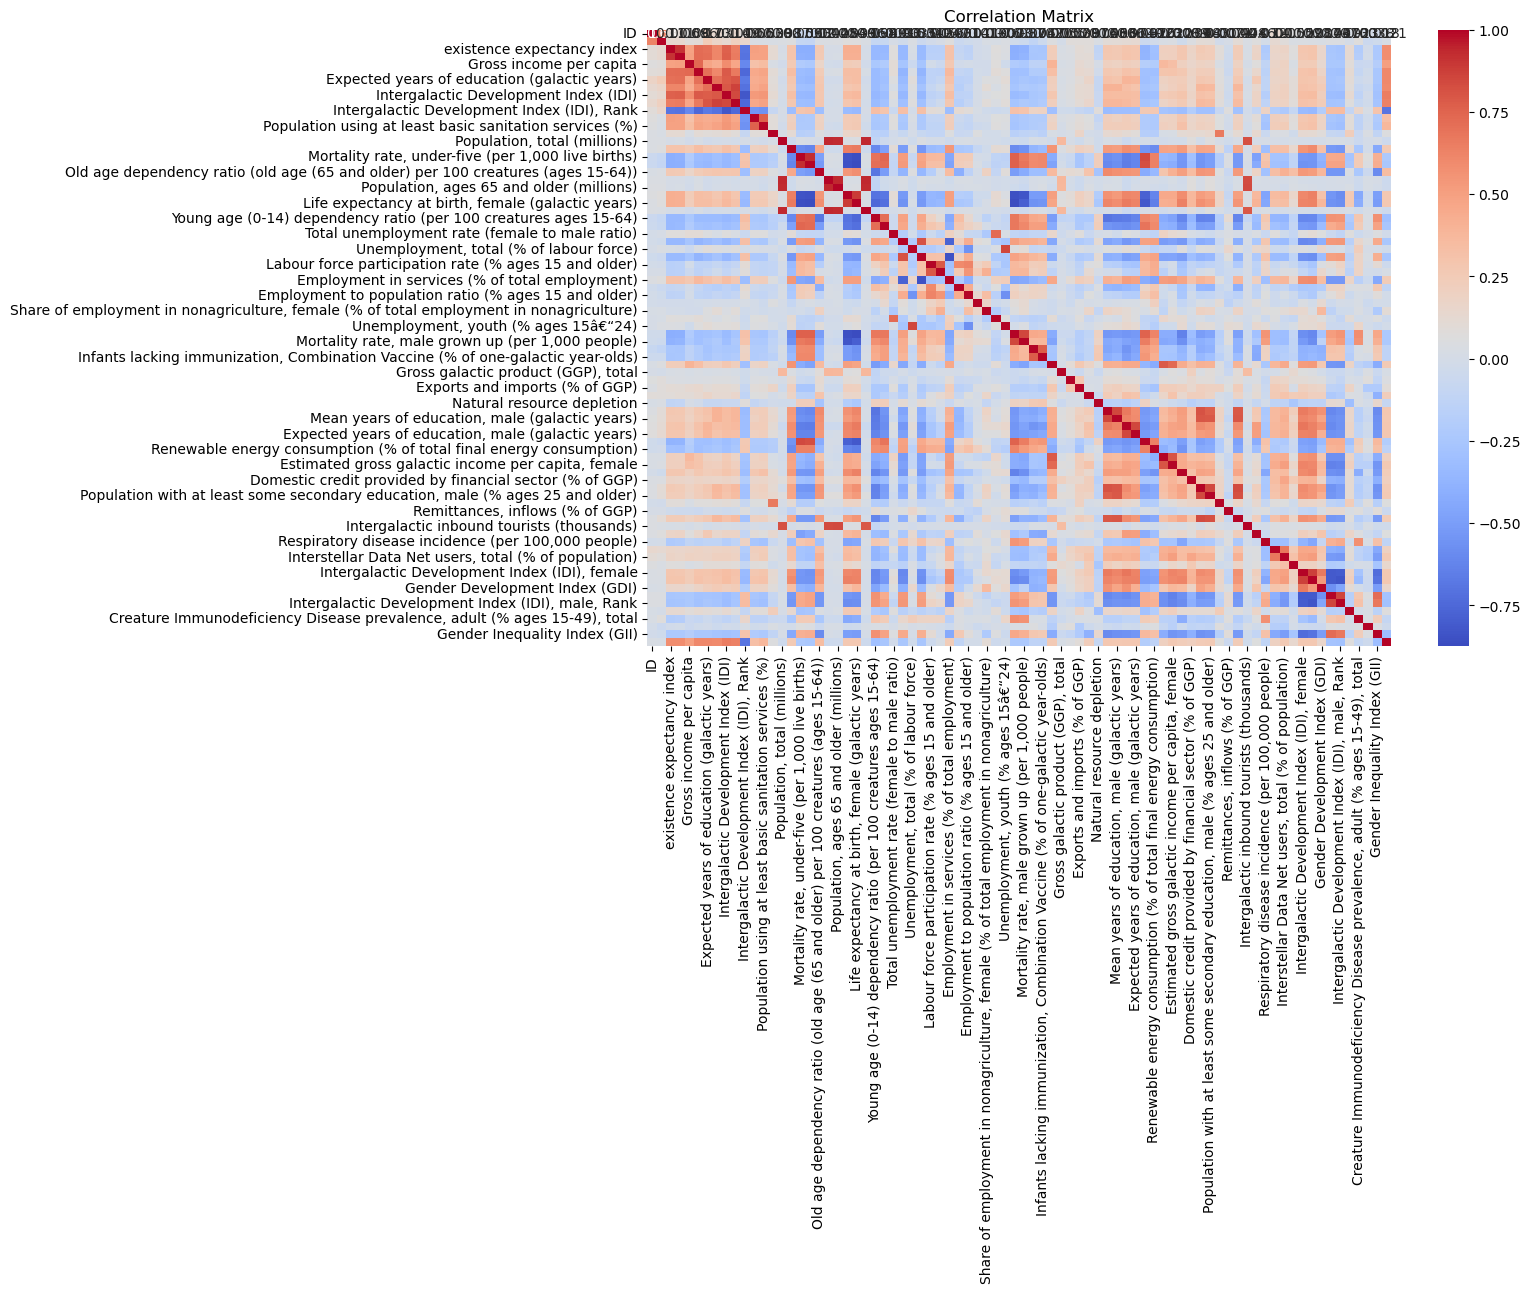

In [313]:
# Correlation matrix to understand the relationship between variables
corr_matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Features with high correlation**

In [346]:
#select features with high correlation with Well-Being Index and sort the values in descending order
#select top 10
high_corr_features = corr_matrix['Well-Being Index'].sort_values(ascending=False)[0:10]
print(high_corr_features)

Well-Being Index                                           1.000000
Intergalactic Development Index (IDI)                      0.650376
Education Index                                            0.634305
Expected years of education (galactic years)               0.607690
Income Index                                               0.605611
Mean years of education (galactic years)                   0.602300
existence expectancy at birth                              0.587887
existence expectancy index                                 0.584526
Gross income per capita                                    0.507008
Population using at least basic sanitation services (%)    0.376279
Name: Well-Being Index, dtype: float64


# Visulaization

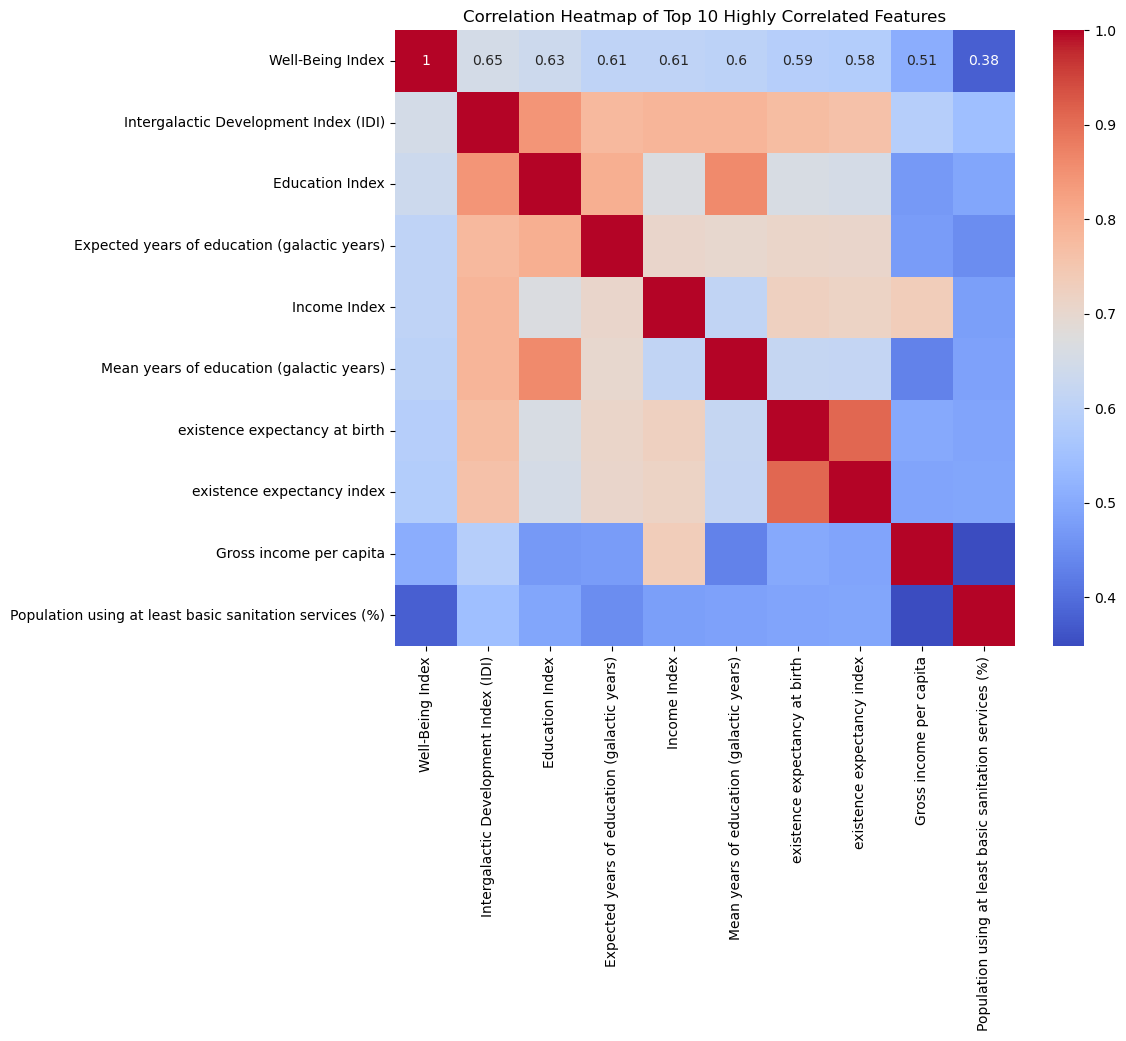

In [317]:
#visualize top 20 correlation matrix
high_corr_features_20 = high_corr_features.index
high_corr_features_20 = train_df[high_corr_features_20].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_features_20, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top 10 Highly Correlated Features')
plt.show()

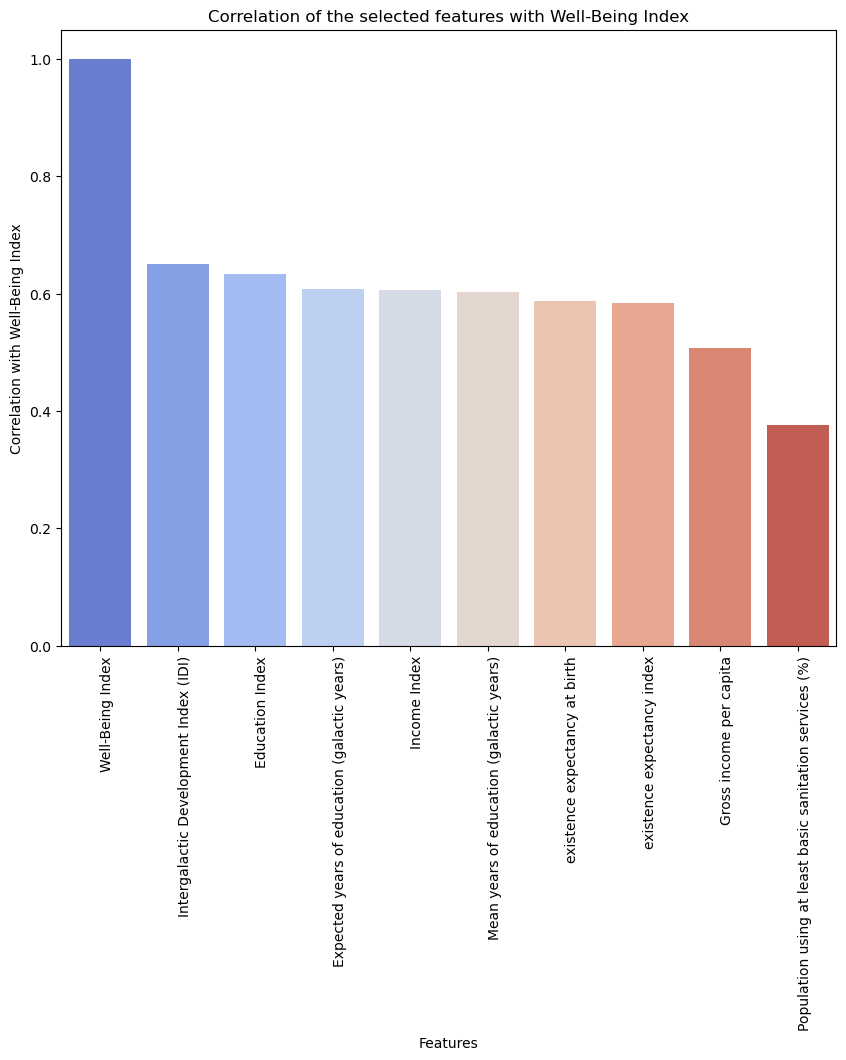

In [318]:
# Plotting the correlation with high_corr_matrix
plt.figure(figsize=(10, 8))
sns.barplot(x=high_corr_features.index, y=high_corr_features.values, palette='coolwarm')
plt.title('Correlation of the selected features with Well-Being Index')
plt.xlabel('Features')
plt.ylabel('Correlation with Well-Being Index')
plt.xticks(rotation=90, ha='left')
plt.show()

C:\Users\LENZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


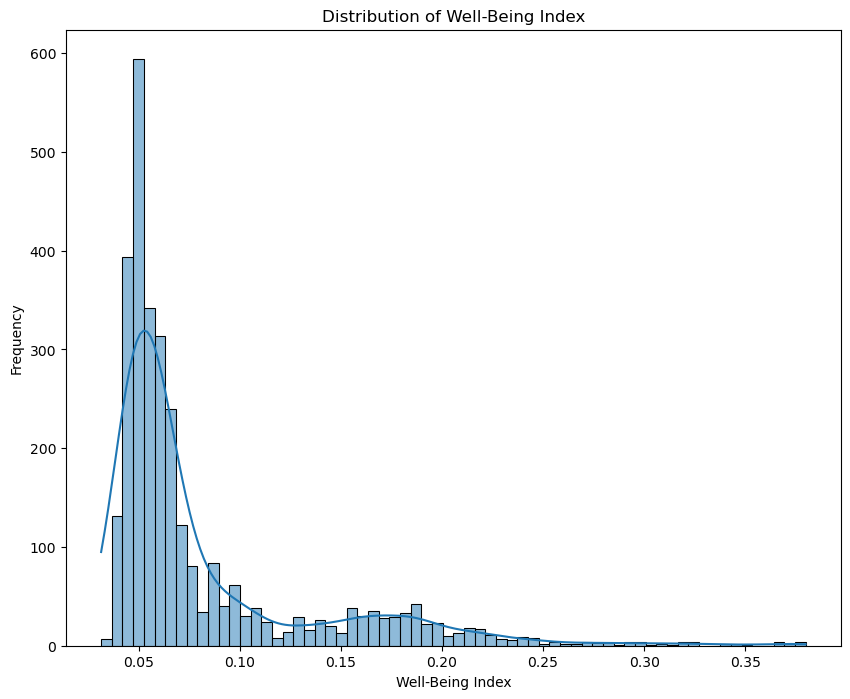

In [319]:
# Visualization of the distribution of well-being index
plt.figure(figsize=(10, 8))
sns.histplot(train_df['Well-Being Index'], kde=True)
plt.title('Distribution of Well-Being Index')
plt.xlabel('Well-Being Index')
plt.ylabel('Frequency')
plt.show()

**Insights** <br>
The distribution of 'Well-Being Index' is right-skewed. This indicates that there are outliers that affect mean more than the median. <br>
The right-skeweness of the histogram indicates that there are galaxies that have significantly higher Well-Being Index values than the majority. this skewness can indicate various things that can inform our decision during prediction.

# Feature Selection

In [322]:
# Separate features and target variable
X_train = train_df.drop(columns=["Well-Being Index", "galaxy"])

In [323]:
X_train.shape

(3097, 79)

In [324]:
y_train = train_df["Well-Being Index"]
y_train.shape

(3097,)

## Training Model

**Random Forest Regressor**

In [327]:
# Model training
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

#dataframe to store feature importances
ft_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features
ft_importance_df = ft_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
ft_importance_df

,Feature,Importance
10,"Intergalactic Development Index (IDI), Rank",0.525533
8,Intergalactic Development Index (IDI),0.079736
9,Education Index,0.074807
2,existence expectancy index,0.062685
3,existence expectancy at birth,0.052130
...,...,...
56,"Estimated gross galactic income per capita, fe...",0.000103
55,"Estimated gross galactic income per capita, male",0.000089
69,Current health expenditure (% of GGP),0.000083
71,"Intergalactic Development Index (IDI), male",0.000074


This is an output for feature importance that is stored in a temporary location ft_importance_df. Random Forest Model has been used to calculate the feature importances. it produces columns like Feature and Importance. ***Feature*** is the name of the variable in the dataset while ***Importance*** indicates the importance of each variable in prediction. ***Importance*** score highlights how much each variable contributes to the target variable.

#### Make Predictions

***Separate features in validation dataset***

In [331]:
X_validate = validation.drop(['Predicted Well-Being Index', 'galaxy'], axis=1)
X_validate.shape

(720, 79)

In [332]:
#Make predictions

y_predict = rf_model.predict(X_validate)

In [333]:
#create Dataset for the predicted DataFrame

predicted_df = pd.DataFrame({'Predicted Well-Being Index': y_predict}, index=X_validate.index)

predicted_df.head()

,Predicted Well-Being Index
0,0.051319
1,0.052259
2,0.043943
3,0.047492
4,0.048972


In [334]:
#Concatenate validation and predicted datasets

validation_predicted_df = pd.concat([X_validate, predicted_df], axis=1)
validation_predicted_df

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
0,886447,1004004,0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,0.745786,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.051319
1,687564,1005006,0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,0.806982,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.052259
2,494935,1006009,0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,0.852921,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.043943
3,378919,1015056,0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,0.801123,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,24.753738,0.574781,0.047492
4,421878,1004004,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,0.528564,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.048972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,389587,1015056,1.010563,92.515213,61890.59381,1.219435,18.016207,13.395910,1.020538,0.871133,...,0.942637,0.928915,1.038498,111.875906,92.223765,26.147343,3.203769,18.505791,0.406823,0.177038
716,17112,1003002,0.628426,58.772174,26523.82527,0.572390,9.186143,3.807712,0.525476,0.366503,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.043844
717,583782,1004004,0.603825,58.301528,10659.49479,0.629569,7.827124,4.244244,0.615265,0.402917,...,0.847814,0.864749,1.017964,126.282768,125.302843,21.463226,6.727467,21.009808,0.574781,0.043402
718,823832,1005006,0.574464,53.416728,23157.55806,0.627428,9.626455,6.992821,0.464677,0.402599,...,0.435978,0.553943,0.904474,188.266739,197.539740,25.349771,6.737562,18.429657,0.859253,0.042251


***Feature Extraction from concatenated dataset***

In [336]:
# Extract features (X_validate) from validation_predicted_df
X_validate = validation_predicted_df.drop('Predicted Well-Being Index', axis=1)

# Extract predicted labels (y_validate) from validation_predicted_df
y_validate = validation_predicted_df['Predicted Well-Being Index']

# Evaluation using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_validate, y_predict))
rmse

0.0

The root mean squared error is 0 on the validation data

In [338]:
#predicting future values

y_validate = validation_predicted_df['Predicted Well-Being Index']
output_df = 'predictions_ft_values.csv'
pd.DataFrame({'Predicted Well-Being Index': y_predict}).to_csv(output_df, index=False)
print('Future values have been saved to:', output_df)

Future values have been saved to: predictions_ft_values.csv


In [352]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Evaluations
rmse = np.sqrt(mean_squared_error(y_validate, y_predict))
mean_abs_error = mean_absolute_error(y_validate, y_predict)
r2 = r2_score(y_validate, y_predict)

# Print the evaluation metrics
print("Random Forest Regressor Model:")
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mean_abs_error)
print("R-squared (R2):", r2)

Random Forest Regressor Model:
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared (R2): 1.0


**Insights**<br><br>
The Random Forest Regressor Model produces what seems to be perfect scores. The RMSE of 0.0, MAE of 0.0, and R2 of 1.0 indicates that the predictions match the actual values perfectly. This perfect match suggests a scenario where the model is overfitting the training dataset. This is unusual in the real world and suggests that the model has learned the training data very well that it is able to capture noise and other patterns in the data.

***Linear Regression Model***

In [350]:
linear_model = LinearRegression()

#fit the linear model
linear_model.fit(X_train, y_train)

#Prediction
y_predict_linear = linear_model.predict(X_validate)

#Evaluation
rmse_linear = np.sqrt(mean_squared_error(y_validate, y_predict_linear))
mean_absolute_linear = mean_absolute_error(y_validate, y_predict_linear)
r2_linear = r2_score(y_validate, y_predict_linear)

#print
print("Linear Regression Model:")
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("Mean Absolute Error (MAE):", mean_absolute_linear)
print("R-squared (R2):", r2_linear)

Linear Regression Model:
Root Mean Squared Error (RMSE): 0.02816903132764668
Mean Absolute Error (MAE): 0.022238980690788848
R-squared (R2): 0.7989102795574654


**Insights**<br><br>
Linear regression modeling provides a more realistic performance metrics for data predictions. RMSE and MAE values are average magnitude of errors in predictions made. Lower values for RMSE and MAE are better.
R-squared (R2) value is the proportion of the variance in the dependent variable predictable from the independent features. An R-squared of 0.7984 indicates that approximately 79.84% of the variance in the dependent variable is explained by the model. This is quite realistic in the real world.

#### **Save predictions for Linear Regression Model**

In [348]:
# Save the predictions
output_file_path = 'Jackline_Mboya_DSA.csv'
output_df = pd.DataFrame({'ID': validation['ID'], 'Predicted Well-Being Index': y_predict_linear})
output_df.to_csv(output_file_path, index=False)

# Print the confirmation message
print('Combined predictions have been written to:', output_file_path)

# Read the saved CSV file
saved_output_df = pd.read_csv(output_file_path)

# Display the first few rows of the saved DataFrame
print(saved_output_df.head())


Combined predictions have been written to: Jackline_Mboya_DSA.csv
       ID  Predicted Well-Being Index
0  886447                    0.086140
1  687564                    0.064296
2  494935                    0.073754
3  378919                    0.047154
4  421878                    0.075238
